<a href="https://colab.research.google.com/drive/1_7ZERbrfywPfYD4pPOh6PNoDqQ-0Yq8D?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random number generators

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Which properties should a good random number generator have?
* must be able to generate numbers that are uniformly distributed in [0, 1]
* pass statistical tests (which ones?)
* high speed of generation
* large period
* it works on any platform
* reproducibility
* cryptographic security (whether this is consistent with previous punctuations?)

Random number generator is an **deterministic** (!) algorithm that generates a sequence of numbers that meet certain statistical requirements for randomness. The sequence is not truly random in that it is completely determined by an initial value, called the seed. The same sequence of numbers is generated from the same seed.

## Middle-square algorithm
John von Neumann, 1949

Ideas:
1. set a four-digit seed - the first number of the random sequence
2. square it, get an 8-digit number (if necessary, pad with zeros)
3. take a four-digit number from the middle - this is the next element of the random sequence
4. repeat 2-3

In [2]:
import numpy as np

def midsquare(val, n=4):
    return int(str(val**2).zfill(2*n)[n//2:-n//2])

seed = 5497
seq = [seed]
for _ in range(100):
    seq.append(midsquare(seq[-1]))
np.array(seq)

array([5497, 2170, 7089, 2539, 4465, 9362, 6470, 8609, 1148, 3179, 1060,
       1236, 5276, 8361, 9063, 1379, 9016, 2882, 3059, 3574, 7734, 8147,
       3736, 9576, 6997, 9580, 7764, 2796, 8176, 8469, 7239, 4031, 2489,
       1951, 8064,  280,  784, 6146, 7733, 7992, 8720,  384, 1474, 1726,
       9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100,
       8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100,
       4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100,
       2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100])

```
… random numbers should not be
generated with a method chosen at
random. Some theory should be
used.
```
D. Knuth

## Linear congruential generator (LCG)

Linear congruential generator (LCG) is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear equation. The method represents one of the oldest and best-known pseudorandom number generator algorithms. The theory behind them is relatively easy to understand, and they are easily implemented and fast, especially on computer hardware which can provide modulo arithmetic by storage-bit truncation.
$$ z_{i+1} = (az_i + c) \mod m $$

A number $z_0$ called the **seed**. It makes the sequence reproducible.

Let's implement LCG and test it (on practice it is implemented a little bit complicated, but we will use a simple version for educational purposes).

In [3]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Here are 10 first numbers of the sequence generated by LCG:

In [4]:
[rng() for _ in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

So how do we verify that the sequence does indeed resemble a sample from a uniform distribution?

Let's do a larger sample:

In [5]:
samples = [rng() for _ in range(1000)]

Our first "test" is to plot the histogram of the sequence.

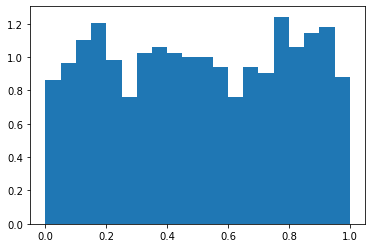

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(samples, bins=20, density=True)
plt.show()

The histogram does not seem to contradict the hypothesis of uniformity of distribution, but more accurate quantitative estimates are needed. They are obtained with the help of statistical tests.

# Statistical Tests

The general idea of statistical tests. Suppose we want to test the hypothesis that a sample $X$ belongs to some particular (very particular) distribution $F$. The problem is to come up with a statistic (a function of the sample) $T(X)$ which, if our hypothesis is true, will have (at $n\to\infty$) a priori known distribution, e.g. $\mathcal{N}(0, 1)$. Let's calculate the value of the statistic $T=T(X)$ on our sample. If the obtained number $T$ is highly atypical for a normal $\mathcal{N}(0, 1)$ distribution, we reject the hypothesis. More precisely, we calculate $p=P(|\xi|\ge|T|)$ for $\xi\sim N(0,1)$. This number $p$ has a special name: $p$-value. If it is small, e.g., less than $0.05$, it is a reason to reject the hypothesis.

Next, we will discuss specific tests.

## Kolmogorov-Smirnov test

We test the hypothesis that the sample is drawn from the $F$ distribution.
Calculate the statistic
$$T(X) = \sup_x| F(x) - F_n(x)|,$$
where $F_n(x)$ is the empirical distribution function constructed from a sample $X$ of size $n$.
Essentially, $T$ is the largest distance between the two plots (see the picture below).

It turns out that if the hypothesis is true, the value $\sqrt{n}T$ has (in the limit of large $n$) a special distribution called the [Kolmogorov distribution](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0).

The Kolmogorov distribution is tabular, so for any value of the statistic $T$ we can find the $p$-value and see if it is small or not.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/KS_Example.png/450px-KS_Example.png)

In practice, everything is done in one line (tests the hypothesis that the sample belongs to a uniform distribution `stats.uniform.cdf`):

In [7]:
from scipy import stats

stats.kstest(samples, stats.uniform.cdf)

KstestResult(statistic=0.026368738710880302, pvalue=0.48207388563860043)

How to interpret the results?

statistic=$0.02637$ - statistic value (maximum distance between graphs)

pvalue=$0.48207$ - p-value for this statistic value. We see that pvalue $> 0.05$, so we decide NOT to reject the hypothesis of a uniform distribution.

For comparison, let's test the hypothesis that the sample is generated by a normal law:

In [8]:
stats.kstest(samples, stats.norm.cdf)

KstestResult(statistic=0.500866322716208, pvalue=1.4724733582412854e-232)

Here the p-value is extremely small and we safely reject the hypothesis.

## Chi-squared test (Pearson's chi-squared test)

One of the most popular tests. Again we test the hypothesis that the sample (of size $n$) came from the distribution $F$. The idea is to divide the whole area of definition of a random variable into $K$ intervals and in each interval to calculate how many elements of the sample fell into the given interval and how many we would expect to see there, if the sample had size n and was generated by the $F$ distribution. We compile the statistics
$$\chi^2_{K-1}=\sum\limits_{i=1}^{K}\frac{(E_i-O_i)^2}{E_i}$$

$E_i, O_i $ are the expected and observed numbers of sample items in the i-th value interval.

It is recommended to choose $K$ such that $O_i, E_i \ge 5$.

If the hypothesis is true, the criterion statistic has (in the limit of large $n$) a $\chi^2$ distribution with $K-1$ degrees of freedom.

Example of the $\chi^2$ distribution:

In [9]:
k = 20
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

f_obs, f_exp, stats.chisquare(f_obs, f_exp)

(array([42, 49, 55, 60, 49, 38, 51, 53, 51, 50, 50, 47, 38, 47, 45, 65, 50,
        60, 56, 44], dtype=int64),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50]),
 Power_divergenceResult(statistic=18.599999999999998, pvalue=0.48275240319942647))

Conclusion - the observed value of the statistic does not contradict the hypothesis of uniform distribution.

Problem: sequences `sorted(samples)` and `samples` are indistinguishable for $KS$ and $\chi^2$ tests. We need additional tests.

## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

In [15]:
def serial_test(x):
    series = []
    for i in range(len(x) // 2):
        series.append([x[i], x[i + 1]])
    return stats.chisquare(series)

serial_test(samples)

Power_divergenceResult(statistic=array([86.55402309, 86.06008068]), pvalue=array([1., 1.]))

### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

### Problem 2*
Implement permutation test and apply to a `samples`

In [10]:
# Your code here

The choice of parameters $m$, $a$ and $c$ has a significant impact on the quality of the sequence. If the parameters are chosen unsuccessfully, it can lead to unexpected consequences:

In [15]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

The histogram of the distribution is similar to a uniform distribution:

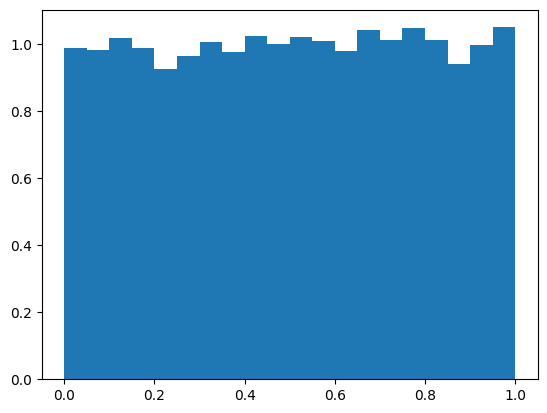

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.hist(random, 20, density=True)
plt.show()

However, the series test shows that the points are located on hyperplanes, which does not fit well with the notion of randomness:

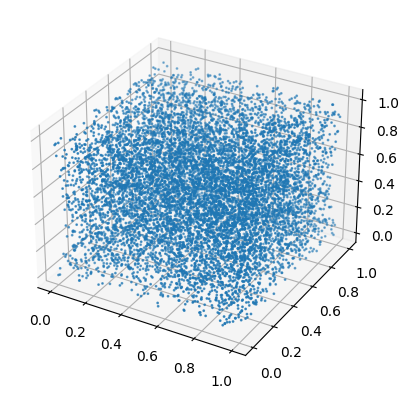

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(random[::3], random[1::3], random[2::3], s=1)
plt.show()

In [18]:
import plotly.express as px

fig = px.scatter_3d(x=random[::3], y=random[1::3], z=random[2::3], opacity=0.1)
fig.update_traces(marker_size = 2)
fig.show()

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [15]:
# Your code here

* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

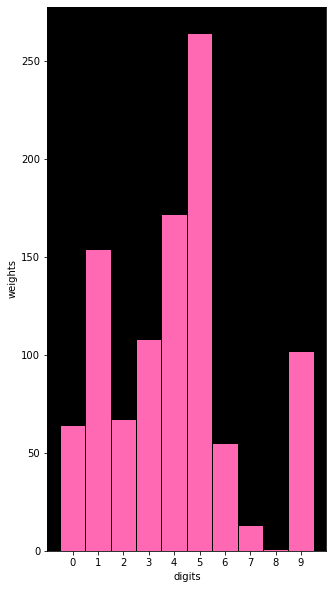

In [36]:
def sample_creation():
    digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    weights /= weights.sum()

    sample = np.random.choice(digits, size = 1000, p = weights)
    sample_histogram(sample)

def sample_histogram(x):
    plt.figure(figsize = (5, 10))
    plt.hist(x, bins = np.arange(11) - 0.5, color = 'hotpink', edgecolor = 'black')
    ax = plt.gca()
    ax.set_facecolor('black')
    plt.xticks(np.arange(10))
    plt.xlabel('digits')
    plt.ylabel('weights')
    plt.show()
    
sample_creation()


## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

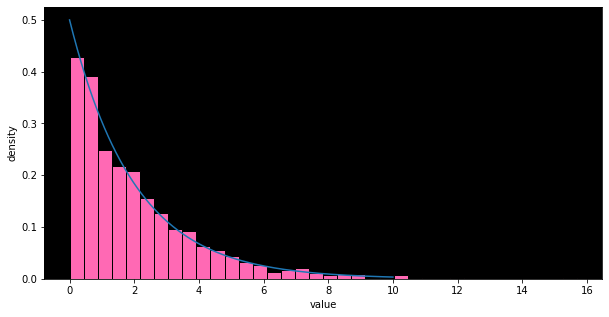

In [69]:
def sample_creation():
    lambda_value = 1 / 2

    x = np.random.uniform(0, 1, 1000)
    samples = - np.log(1 - x) / lambda_value
    sample_histogram(samples, lambda_value)

def sample_histogram(samples, lambda_value):
    plt.figure(figsize = (10, 5))
    plt.hist(samples, bins = "auto", density = True, color = 'hotpink', edgecolor = 'black')
    x = np.linspace(0, 10, 1000)
    plt.plot(x, lambda_value * np.exp(- lambda_value * x))
    ax = plt.gca()
    ax.set_facecolor('black')
    plt.xlabel('value')
    plt.ylabel('density')
    plt.show()
    
sample_creation()

## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x$ on the segment $\left[-\dfrac\pi2, \dfrac\pi2\right]$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

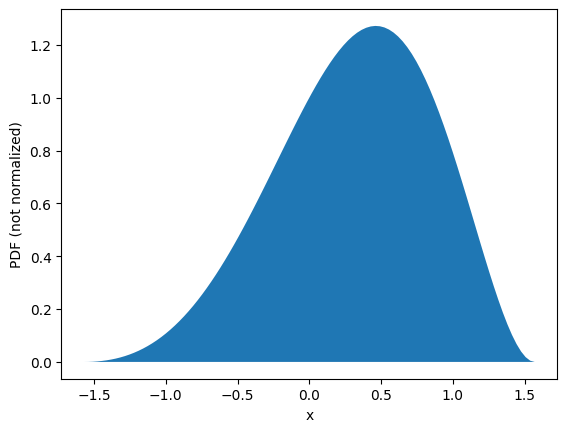

In [19]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

In [19]:
# Your code here

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

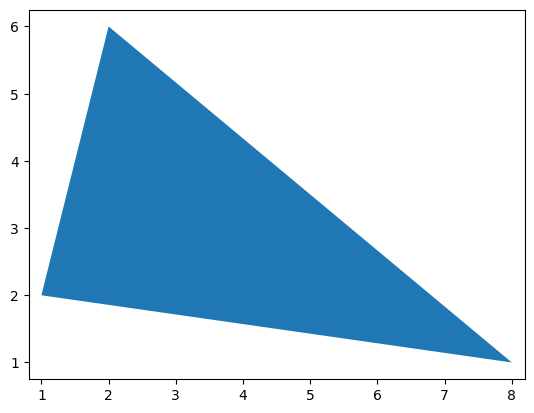

In [20]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

Используются барицентрические координаты


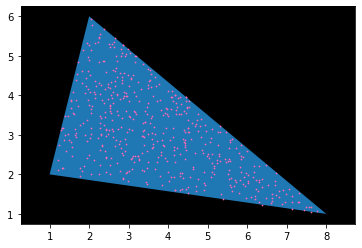

In [96]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def plot():
    fig, ax = plt.subplots()
    polygon = Polygon(xy = np.array([[1, 2], [2, 6], [8, 1]]), closed = True, zorder = - 10)
    plt.gca().add_collection(PatchCollection([polygon]))
    ax.set_facecolor('black')
    r1 = np.sqrt(np.random.random(500))
    r2 = np.random.random(500)
    l1 = 1 - r1
    l2 = r1 * (1 - r2)
    l3 = 1 - l1 - l2
    samples = l1[:, None] * np.array([1, 2]) + l2[:, None] * np.array([2, 6]) + l3[:, None] * np.array([8, 1])
    ax.scatter(samples[:, 0], samples[:, 1], color = 'hotpink', s = 0.5)
    plt.axis('equal')
    plt.show()
    
plot()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

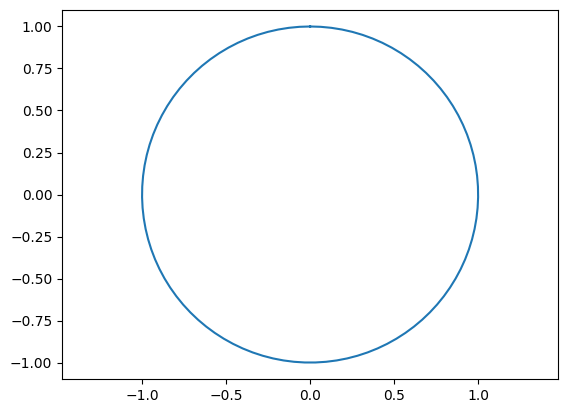

In [21]:
fig = plt.figure()

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

Координаты стандартные для окружности 

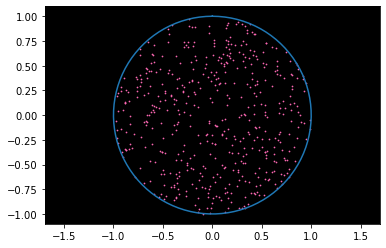

In [97]:
def plot():
    r = np.sqrt(np.random.uniform(0, 1, 500))
    phi = np.random.uniform(0, 2 * np.pi, 500)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.scatter(x, y, color = 'hotpink', s = 0.5)
    ax = plt.gca()
    ax.set_facecolor('black')
    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.sin(t), np.cos(t))
    plt.axis('equal')
    plt.show()
    
plot()

# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

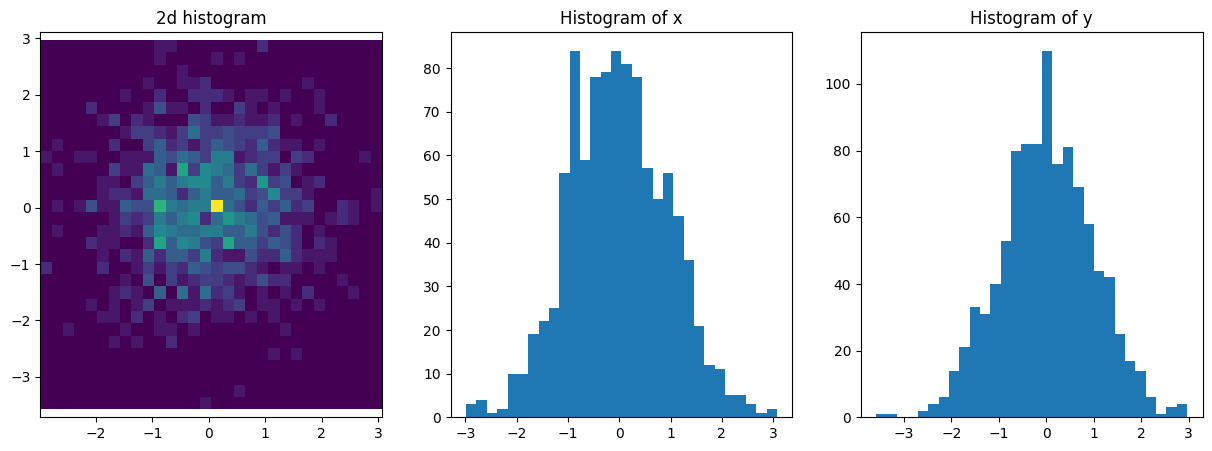

In [24]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [25]:
# Your code here

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [26]:
# Your code here

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



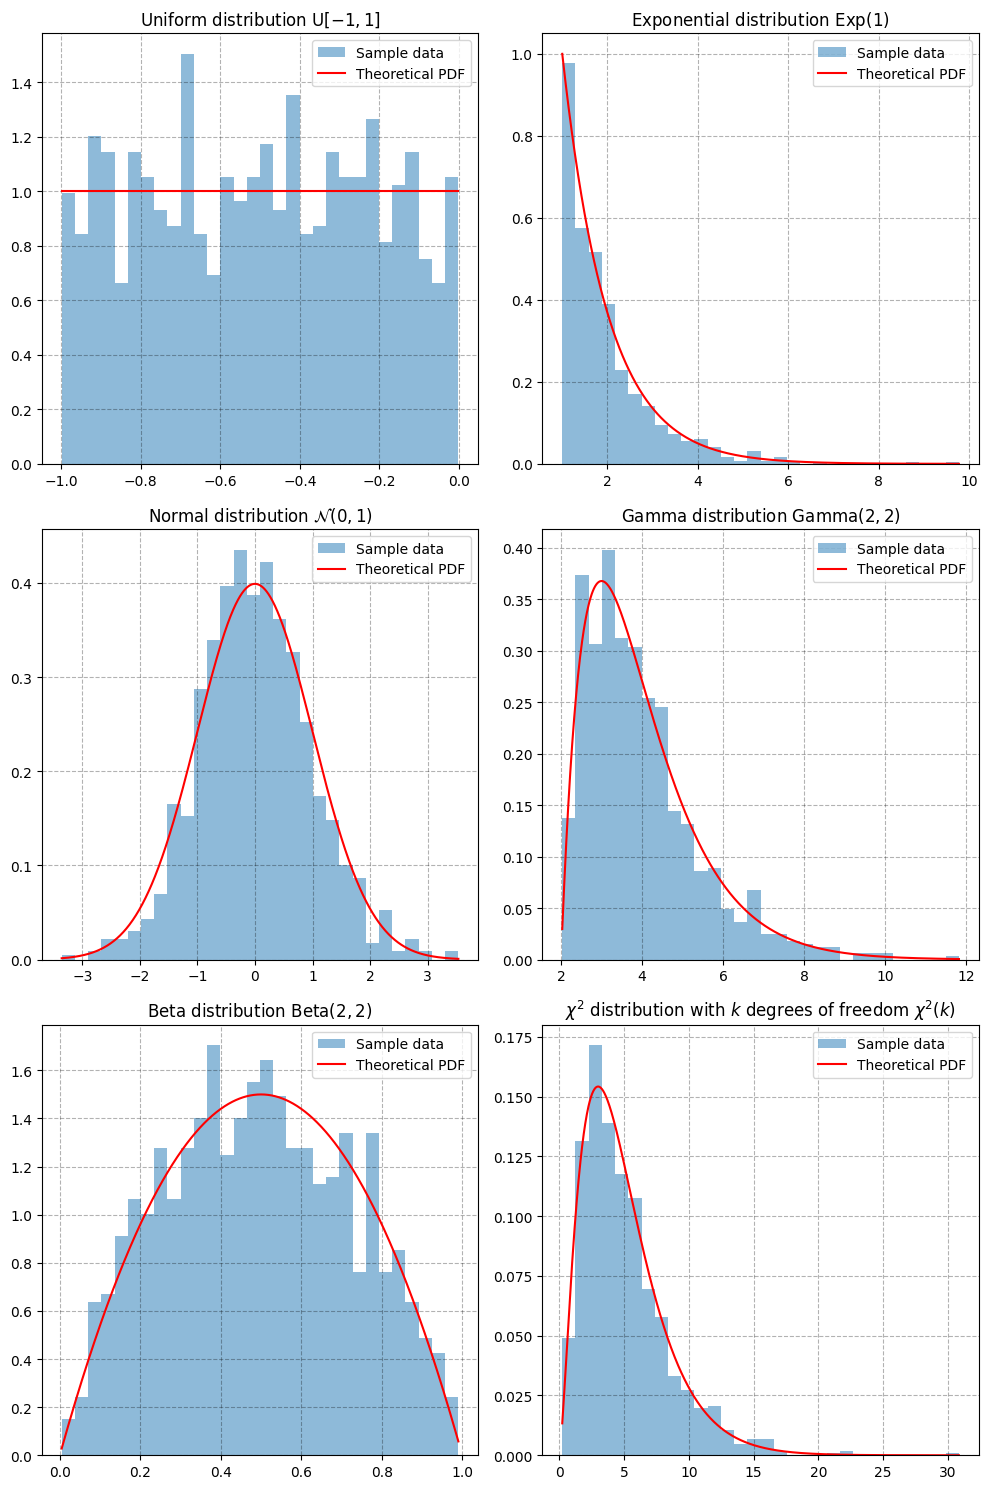

In [29]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\operatorname{Gamma}(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{Beta}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(k)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)
    
    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
